In [1]:
import os
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Path to Tesseract OCR engine
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [ ]:
import pytesseract
import easyocr
# Function to enhance the image
def enhance_image(image):
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply histogram equalization
    equalized = cv2.equalizeHist(gray)
    
    # Apply Gaussian blur
    blur = cv2.GaussianBlur(equalized, (5, 5), 0)
    
    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    return thresh

def enhance_image2(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply histogram equalization
    equalized = cv2.equalizeHist(gray)
    
    # Apply Gaussian blur
    blur = cv2.GaussianBlur(equalized, (9, 9), 0)
    
    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    return thresh

def adaptive_thresholding(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    return thresh

def clahe_enhancement(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    lab_planes = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    lab_planes[0] = clahe.apply(lab_planes[0])
    lab = cv2.merge(lab_planes)
    bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    return bgr

def gaussian_sharpening(img):
    blurred = cv2.GaussianBlur(img, (0, 0), 3)
    sharp = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)
    return sharp

def morphological_enhancement(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel, iterations=1)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=1)
    return closing

# Function to perform OCR on the image
# Function to perform OCR using pytesseract
# def perform_ocr_pytesseract(image):
#     # Perform OCR using pytesseract
#     text = pytesseract.image_to_string(image)
    
#     # Print the recognized text
#     print("Recognized Text (pytesseract):", text)

# # Function to perform OCR using easyocr

def sidebyside(image):
    # Perform OCR on the original and enhanced images
    og_img = perform_ocr(image)
    en_img = perform_ocr(enhance_image(image))
    en_img2 = perform_ocr(enhance_image2(image))
    en_img3 = perform_ocr(adaptive_thresholding(image))
    en_img4 = perform_ocr(clahe_enhancement(image))
    en_img5 = perform_ocr(gaussian_sharpening(image))
    en_img6 = perform_ocr(morphological_enhancement(image))

    print("Original Image:", og_img)
    print("\nEnhanced Image:", en_img)
    print("\nEnhanced Image2:", en_img2)
    print("\nEnhanced Image3:", en_img3)
    print("\nEnhanced Image4:", en_img4)
    print("\nEnhanced Image5:", en_img5)
    print("\nEnhanced Image6:", en_img6)

    fig, axs = plt.subplots(1, 6, figsize=(15, 5))  # Create a 1x3 subplot

    # Display the original image
    axs[0].imshow(image if len(image.shape) == 2 else cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
    axs[0].set_title('Original Image')

    # Display the enhanced image
    enhanced_image = enhance_image(image)
    axs[1].imshow(enhanced_image if len(enhanced_image.shape) == 2 else cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2GRAY))
    axs[1].set_title('Enhanced Image')

    # Display the enhanced image2
    enhanced_image2 = enhance_image2(image)
    axs[2].imshow(enhanced_image2 if len(enhanced_image2.shape) == 2 else cv2.cvtColor(enhanced_image2, cv2.COLOR_BGR2GRAY))
    axs[2].set_title('Enhanced Image2')

    # Display the enhanced image3
    enhanced_image3 = adaptive_thresholding(image)
    axs[3].imshow(enhanced_image3 if len(enhanced_image3.shape) == 2 else cv2.cvtColor(enhanced_image3, cv2.COLOR_BGR2GRAY))
    axs[3].set_title('Enhanced Image3')

    # Display the enhanced image4
    enhanced_image4 = clahe_enhancement(image)
    axs[4].imshow(enhanced_image4 if len(enhanced_image4.shape) == 2 else cv2.cvtColor(enhanced_image4, cv2.COLOR_BGR2GRAY))
    axs[4].set_title('Enhanced Image4')

    # Display the enhanced image5
    enhanced_image5 = gaussian_sharpening(image)
    axs[5].imshow(enhanced_image5 if len(enhanced_image5.shape) == 2 else cv2.cvtColor(enhanced_image5, cv2.COLOR_BGR2GRAY))
    axs[5].set_title('Enhanced Image5')

    # Display the enhanced image6
    enhanced_image6 = morphological_enhancement(image)
    axs[6].imshow(enhanced_image6 if len(enhanced_image6.shape) == 2 else cv2.cvtColor(enhanced_image6, cv2.COLOR_BGR2GRAY))
    axs[6].set_title('Enhanced Image6')

    # Remove the x and y ticks
    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

def perform_ocr(image):
    reader = easyocr.Reader(['en'])
    results = reader.readtext(image)
    text = ' '.join([result[1] for result in results])
    return text

#send it
for image in os.listdir('plates'):
    image = cv2.imread('plates/' + image)
    sidebyside(image)

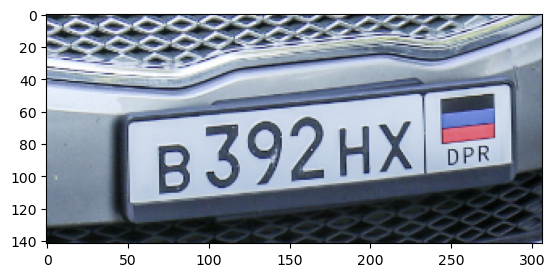

In [4]:
# image_location = 'plates\img.jpg'
image_location = 'plates\img3.png'
# Check if the image file exists
if os.path.isfile(image_location):
    # Load the license plate image
    image = cv2.imread(image_location)

    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(image_rgb)
    plt.show()
else:
    print("Image file", image_location,"not found.")


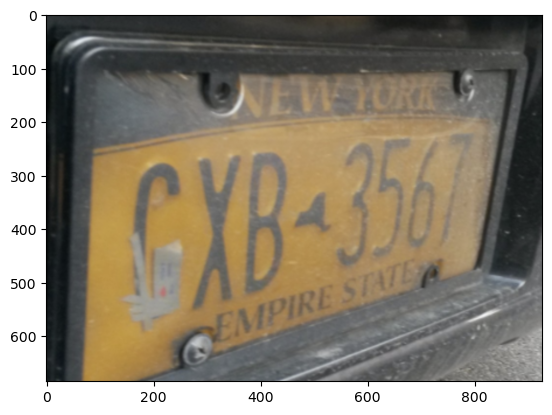

In [6]:
# image_location = 'plates\img.jpg'
image_location = 'plates\obs.png'
# Check if the image file exists
if os.path.isfile(image_location):
    # Load the license plate image
    image = cv2.imread(image_location)

    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(image_rgb)
    plt.show()
else:
    print("Image file", image_location,"not found.")


Original Image: NEAAo CXB-3567 STTE EMPIRE

Enhanced Image: 2} NiE W7 23u4 SSTATEH EMMPIRE

Enhanced Image2: WisiUi STATE; EMPIRE


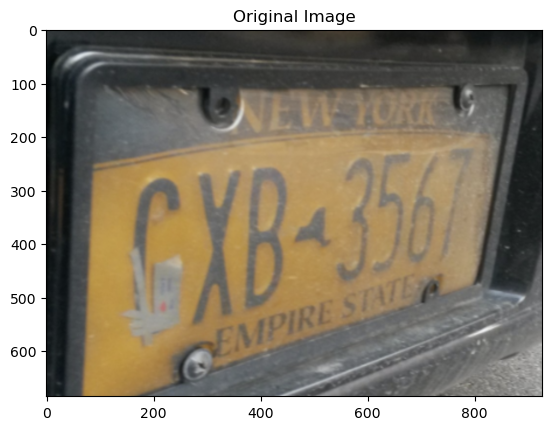

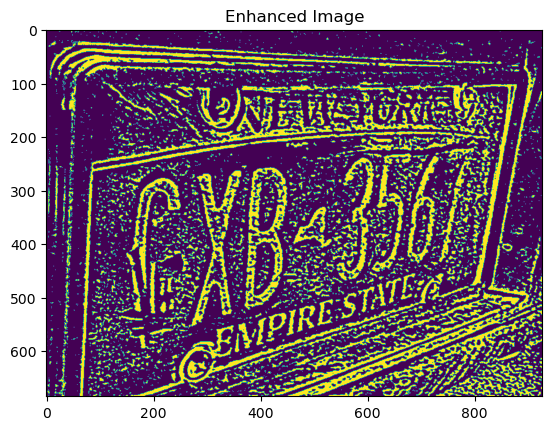

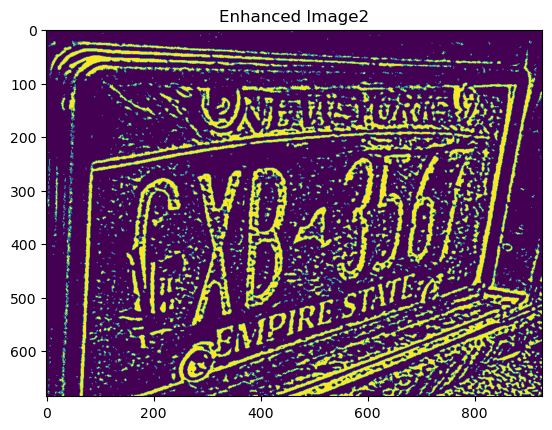

In [7]:
# Enhance the image
enhanced_image = enhance_image(image)

# Perform OCR on the original and enhanced images
og_img = perform_ocr(image)
en_img = perform_ocr(enhanced_image)
en_img2 = perform_ocr(enhance_image2(image))


print("Original Image:", og_img)
print("\nEnhanced Image:", en_img)
print("\nEnhanced Image2:", en_img2)


# Display the original and enhanced images
plt.imshow(image_rgb)
plt.title('Original Image')
plt.show()


plt.imshow(enhanced_image)
plt.title('Enhanced Image')
plt.show()

plt.imshow(enhance_image2(image))
plt.title('Enhanced Image2')
plt.show()
